# Chapter  5: Visualizing Distributions

In [2]:
import datascience 
import pandas as pd 
import numpy as np
from datascience import Table
from datascience import *
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('fivethirtyeight')

### The Data

For this section, we will be using the [CalEnvironScreen 3.0](https://oehha.ca.gov/calenviroscreen/maps-data) dataset from the Ofice of Environmental Health Hazard Assessment. This dataset includes population and pollution data for several counties in California. First, we must import the dataset into our notebook and create a table. We will call this table `ces_data`.

In [4]:
ces_data = Table.read_table('ces_data.csv')
ces_data.take(np.arange(40, 50)).show(3)

Census Tract,CES 3.0 Score,CES 3.0 Percentile,CES 3.0 Percentile Range,Total Population,California County,Children < 10 (%),Pop 11-64 years (%),Elderly > 65 (%),Hispanic (%),White (%),African American (%),Native American (%),Asian American (%),Other (%),ZIP,Nearby City (to help approximate location only),Longitude,Latitude,CES 3.0 Percentile,CES 3.0 Percentile Range,SB 535 Disadvantaged Community,Ozone,Ozone Pctl,PM2.5,PM2.5 Pctl,Diesel PM,Diesel PM Pctl,Drinking Water,Drinking Water Pctl,Pesticides,Pesticides Pctl,Tox. Release,Tox. Release Pctl,Traffic,Traffic Pctl,Cleanup Sites,Cleanup Sites Pctl,Groundwater Threats,Groundwater Threats Pctl,Haz. Waste,Haz. Waste Pctl,Imp. Water Bodies,Imp. Water Bodies Pctl,Solid Waste,Solid Waste Pctl,Pollution Burden,Pollution Burden Score,Pollution Burden Pctl,Asthma,Asthma Pctl,Low Birth Weight,Low Birth Weight Pctl,Cardiovascular Disease,Cardiovascular Disease Pctl,Education,Education Pctl,Linguistic Isolation,Linguistic Isolation Pctl,Poverty,Poverty Pctl,Unemployment,Unemployment Pctl,Housing Burden,Housing Burden Pctl,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl
6.03723e+09,71.53,99.5,95-100% (highest scores),2068,Los Angeles,17.1,76.5,6.4,89.1,1.7,6.1,0.2,2.6,0.2,90021,Los Angeles,-118.25,34.0245,99.5,95-100% (highest scores),Yes,0.046,53.02,12.89,92.89,41.684,94.19,664.07,78.57,0,0,5941.16,84.47,2289.68,93.38,55.6,96.64,4.6,28.85,3.55,95.14,7,71.61,24.7,98.7,73.35,9.03,99.43,87.25,88.14,6.16,79.28,9.3,66.56,59.2,98.02,33,96.01,79.3,98.1,4.1,6.94,24.2,74.38,76.34,7.92,88.88
6.03724e+09,71.36,99.48,95-100% (highest scores),3454,Los Angeles,19.3,74.1,6.6,74.8,0.7,24,0,0.1,0.3,90001,Los Angeles,-118.263,33.973,99.48,95-100% (highest scores),Yes,0.046,53.02,12.05,81.66,26.33,79.39,664.07,78.57,0,0,5153.31,80.77,1289.16,77.92,22.7,85.63,14.5,59.3,0.675,82.3,0,0,4.75,70.62,62.84,7.74,94.54,72.52,80.31,7.41,93.64,10.79,81.41,50.4,94.36,22.5,87.65,72.2,94.47,17.6,91.72,35.8,95.11,88.89,9.22,98.71
6.019e+09,71.34,99.47,95-100% (highest scores),6369,Fresno,18.4,73.2,8.4,58.3,22.5,8.1,0.9,7.9,2.4,93728,Fresno,-119.833,36.7573,99.47,95-100% (highest scores),Yes,0.062,91.1,15.4,97.22,38.25,91.89,756.9,87.13,0.02,11.57,3657.29,75.75,827.41,58.83,6.25,48.98,10.5,50.78,0.31,69.73,0,0,5,73.54,65.11,8.02,96.23,91.21,89.73,8.44,98.09,8.81,61,42.1,88.83,19.3,83.22,80.7,98.58,21.6,96.99,24.6,75.53,85.78,8.9,97.3


If we scroll to the right, we can see a column called `Pesticides`. Notice how a lot of the entries are 0s. When dealing with large datasets, we will often encounter **missing** values. These values are simply empty values that appear when we do not have a value available for a particular record. It is important to clean these meaningless values to carry out analysis of the dataset. Much of data science consists of **cleaning data** which includes **renaming columns**, **reducing the table size to include only the columns of interest**, and **removing missing values.**  

There are various methods of dealing with missing values -- for our purposes, it is safe to simply remove these values from our table.

This has been done for you: simply run the cell below to save a clean and reduced version of the data as `clean_ces_data`. From this point forward, we'll use this cleaned CES data to run our analysis.

To understand our data, it is important to understand what **each row** represents. Notice our first two columns: `California County` & `census_tract`. Each row represents a specific census tract (some specific geographic region) for a given county.  

For instance, our first row represents some small region in the county of Fresno. 

In [6]:
clean_ces_data = Table.read_table('cleaned_data.csv').select('California County', 'census_tract', 'unemployment')
clean_ces_data.show(5)

California County,census_tract,unemployment
Fresno,6.019e+09,17.6
San Bernardino,6.071e+09,12.3
Fresno,6.019e+09,16.1
San Joaquin,6.077e+09,19.6
Fresno,6.019e+09,18.6


The [unemployment rate in California](https://www.labormarketinfo.edd.ca.gov/file/lfmonth/countyur-400c.pdf) as of today is $ 5.6 \% $. *How does this value relate to local unemployment rates?*

In [7]:
ca_unemployment_rate = 3.9

First, we could access the unemployment column from our dataset. 

In [9]:
unemployment = clean_ces_data.column('unemployment')
unemployment

array([17.6, 12.3, 16.1, ...,  1.1,  2.6,  3.5])

We can visualize the distribution of unemployment rates with a histogram.

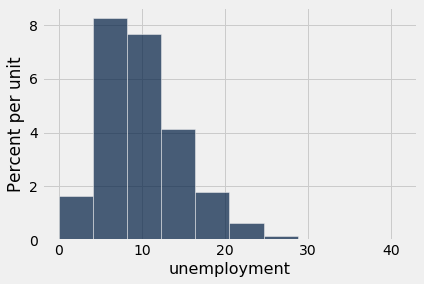

In [10]:
clean_ces_data.hist('unemployment')

Now, we can see how each unemployment rate relates to the California unemployment rate by subtracting. 

In [16]:
#subtracting UNEMPLOYMENT column from CA unemployment rate

unemployment_difference = ca_unemployment_rate - unemployment
unemployment_difference

array([-13.7,  -8.4, -12.2, ...,   2.8,   1.3,   0.4])

We can now add this new array into our data. For now, we will just visualize the first and the last columns.

In [19]:
clean_ces_data = clean_ces_data.with_column('unemployment_diff', unemployment_difference)
clean_ces_data.show(7)

California County,census_tract,unemployment,unemployment_diff
Fresno,6.019e+09,17.6,-13.7
San Bernardino,6.071e+09,12.3,-8.4
Fresno,6.019e+09,16.1,-12.2
San Joaquin,6.077e+09,19.6,-15.7
Fresno,6.019e+09,18.6,-14.7
Los Angeles,6.0372e+09,11.6,-7.7
San Joaquin,6.077e+09,14.4,-10.5


Notice the high amount of negative values. This indicates that a particular census tract has a **higher** unemployment rate than the average California rate.  

Again, we can visualize the distribution of the differences with a histogram.

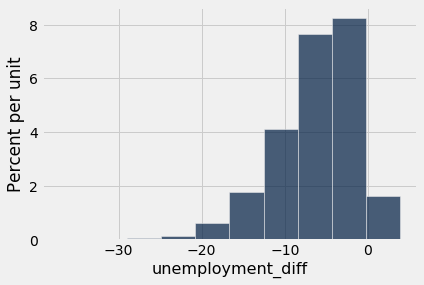

In [21]:
clean_ces_data.hist('unemployment_diff')

By taking a look at this histogram, we can see that most values are negative. This shows us that the majority of census tracts in our dataset have an unemployment rate that is **higher** than California's average. 